In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Charger un fichier CSV
data = pd.read_csv(r'C:\Users\hp\Downloads\casablanca_delivery_dataset.csv')

# Afficher les 5 premières lignes du dataset pour vérifier le contenu
data.head()

,ID,City,Client,Address,Latitude,Longitude
0,1,Casablanca,Client-001,Adresse-1 Rue-94,33.552736,-7.553708
1,2,Casablanca,Client-002,Adresse-2 Rue-85,33.614544,-7.627258
2,3,Casablanca,Client-003,Adresse-3 Rue-35,33.602453,-7.571399
3,4,Casablanca,Client-004,Adresse-4 Rue-68,33.564922,-7.649402
4,5,Casablanca,Client-005,Adresse-5 Rue-42,33.611536,-7.647532


In [4]:
# Afficher la taille du dataset (nombre de lignes et de colonnes)
print("Dimensions du dataset :", data.shape)



Dimensions du dataset : (100, 6)


In [5]:
# Résumé statistique des colonnes numériques
data.describe()

,ID,Latitude,Longitude
count,100.000000,100.000000,100.000000
mean,50.500000,33.579249,-7.597673
std,29.011492,0.024317,0.041421
min,1.000000,33.534649,-7.666254
25%,25.750000,33.557356,-7.631923
50%,50.500000,33.580881,-7.599594
75%,75.250000,33.600620,-7.560671
max,100.000000,33.615574,-7.530822


In [6]:
# Vérification des types de données dans chaque colonne
data.dtypes

ID             int64
City          object
Client        object
Address       object
Latitude     float64
Longitude    float64
dtype: object

In [7]:
# Afficher les valeurs manquantes dans chaque colonne
data.isnull().sum()

ID           0
City         0
Client       0
Address      0
Latitude     0
Longitude    0
dtype: int64

In [8]:
# Vérifier les doublons
data.duplicated().sum()

0

In [9]:
# Trouver les lignes où la latitude ou la longitude est égale à 0
zero_latitude = data[data['Latitude'] == 0]
zero_longitude = data[data['Longitude'] == 0]

# Afficher les résultats
print("Lignes avec Latitude = 0 :")
print(zero_latitude)

print("Lignes avec Longitude = 0 :")
print(zero_longitude)


Lignes avec Latitude = 0 :
Empty DataFrame
Columns: [ID, City, Client, Address, Latitude, Longitude]
Index: []
Lignes avec Longitude = 0 :
Empty DataFrame
Columns: [ID, City, Client, Address, Latitude, Longitude]
Index: []


In [10]:
# Vérifier les valeurs vides dans la colonne City
empty_city = data[data['City'].isnull()]
print("Lignes avec City vide :")
print(empty_city)


Lignes avec City vide :
Empty DataFrame
Columns: [ID, City, Client, Address, Latitude, Longitude]
Index: []


In [11]:
# Calcul de l'IQR pour Latitude
Q1_lat = data['Latitude'].quantile(0.25)
Q3_lat = data['Latitude'].quantile(0.75)
IQR_lat = Q3_lat - Q1_lat

# Détecter les outliers pour Latitude
outliers_lat = data[(data['Latitude'] < Q1_lat - 1.5 * IQR_lat) | (data['Latitude'] > Q3_lat + 1.5 * IQR_lat)]
print("Outliers dans Latitude :")
print(outliers_lat)

# Répéter pour Longitude
Q1_lon = data['Longitude'].quantile(0.25)
Q3_lon = data['Longitude'].quantile(0.75)
IQR_lon = Q3_lon - Q1_lon

outliers_lon = data[(data['Longitude'] < Q1_lon - 1.5 * IQR_lon) | (data['Longitude'] > Q3_lon + 1.5 * IQR_lon)]
print("Outliers dans Longitude :")
print(outliers_lon)


Outliers dans Latitude :
Empty DataFrame
Columns: [ID, City, Client, Address, Latitude, Longitude]
Index: []
Outliers dans Longitude :
Empty DataFrame
Columns: [ID, City, Client, Address, Latitude, Longitude]
Index: []


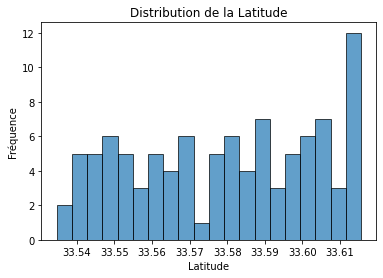

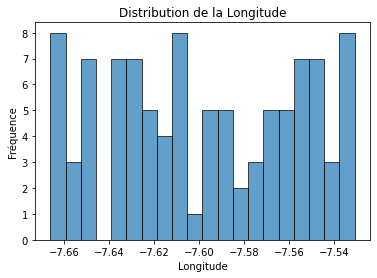

In [12]:
import matplotlib.pyplot as plt

# Distribution de Latitude
plt.hist(data['Latitude'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution de la Latitude')
plt.xlabel('Latitude')
plt.ylabel('Fréquence')
plt.show()

# Distribution de Longitude
plt.hist(data['Longitude'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution de la Longitude')
plt.xlabel('Longitude')
plt.ylabel('Fréquence')
plt.show()


c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


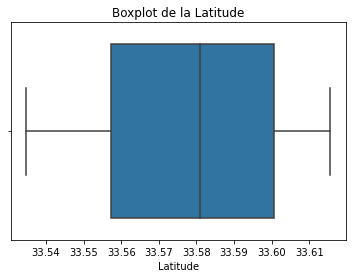

c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


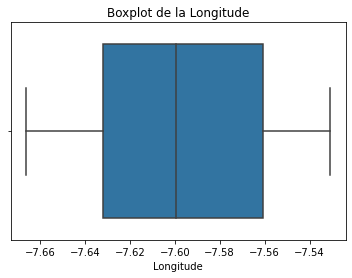

In [13]:
import seaborn as sns

# Boxplot pour Latitude
sns.boxplot(data['Latitude'])
plt.title('Boxplot de la Latitude')
plt.show()

# Boxplot pour Longitude
sns.boxplot(data['Longitude'])
plt.title('Boxplot de la Longitude')
plt.show()


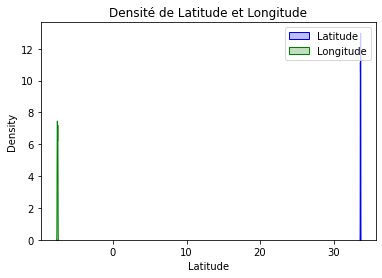

In [14]:
sns.kdeplot(data['Latitude'], shade=True, color='blue', label='Latitude')
sns.kdeplot(data['Longitude'], shade=True, color='green', label='Longitude')
plt.title('Densité de Latitude et Longitude')
plt.legend()
plt.show()
